In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
### for accessing file from google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/last-lab/



Mounted at /content/drive
/content/drive/My Drive/last-lab


In [ ]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**K-MEANS**

In [ ]:
# Selecting Annual Income and Spending Score columns for clustering
X = data.iloc[:, [3, 4]].values

In [ ]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

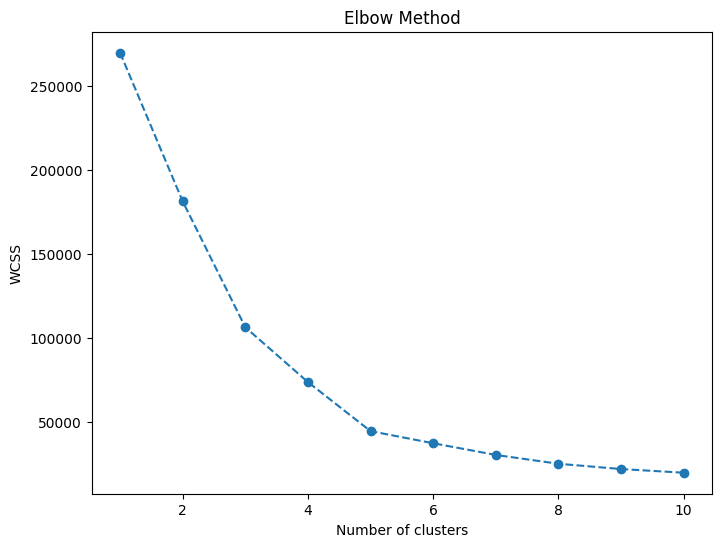

In [ ]:
# Plotting the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


In [ ]:
# Applying k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


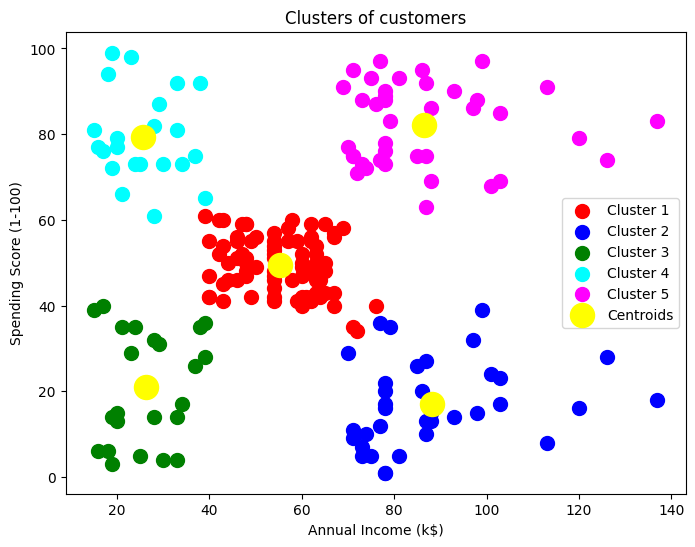

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Density-Based Spatial Clustering of Applications with Noise**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Applying DBSCAN
epsilon = 0.4  # Distance within which points are considered neighbors
min_samples = 5  # Minimum number of points required to form a dense region (including the point itself)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

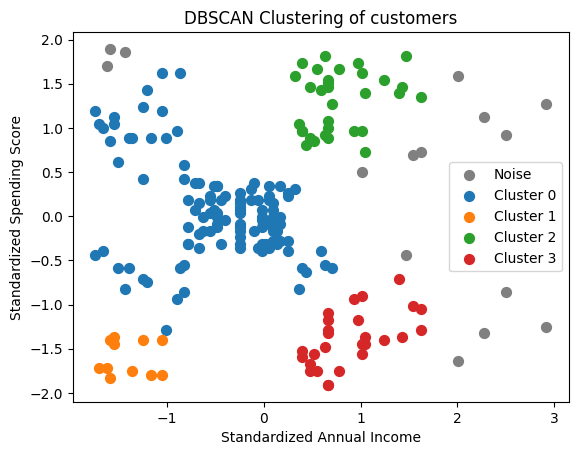

In [ ]:
# Plotting points with noise (cluster = -1)
plt.scatter(X_scaled[clusters == -1, 0], X_scaled[clusters == -1, 1], s=50, c='gray', label='Noise')

# Plotting clusters
for cluster_label in range(max(clusters) + 1):
    if cluster_label == -1:
        continue  # Skip noise points
    plt.scatter(X_scaled[clusters == cluster_label, 0], X_scaled[clusters == cluster_label, 1],
                s=50, label=f'Cluster {cluster_label}')
plt.title('DBSCAN Clustering of customers')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.show()

**Hierarchical clustering**

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

In [ ]:
# Selecting Annual Income and Spending Score columns for clustering
X = data.iloc[:, [3, 4]].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

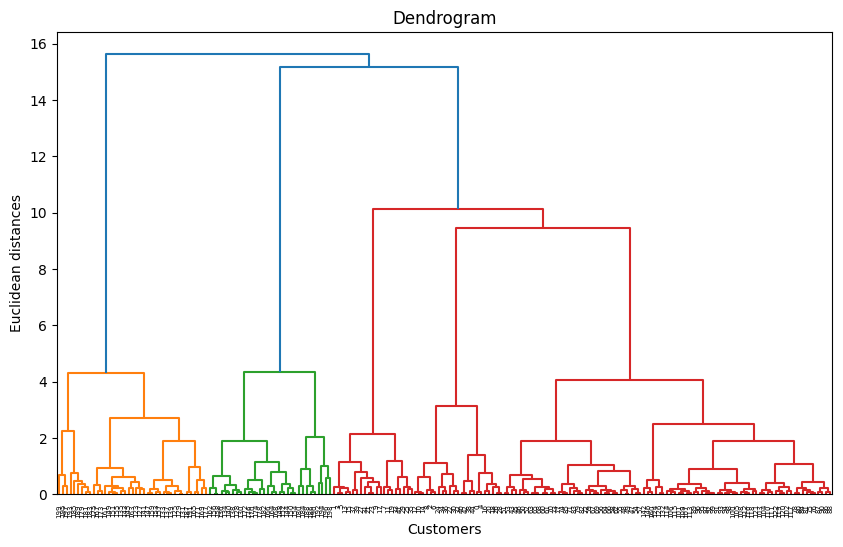

In [ ]:
# Create a dendrogram to find the number of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Applying hierarchical clustering with the determined number of clusters
num_clusters = 5  # Determine this from the dendrogram or your requirements
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
clusters = hc.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


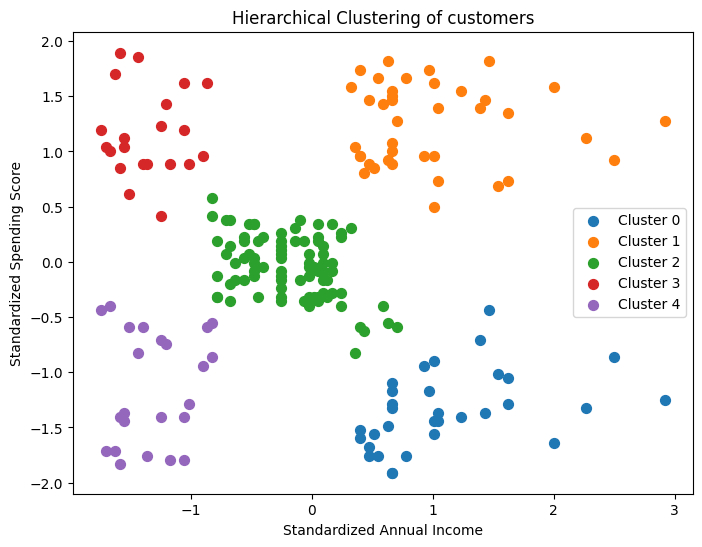

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(num_clusters):
    plt.scatter(X_scaled[clusters == cluster_label, 0], X_scaled[clusters == cluster_label, 1],
                s=50, label=f'Cluster {cluster_label}')

plt.title('Hierarchical Clustering of customers')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend()
plt.show()